# SageMaker End to End Solutions : Fraud Detection for Automobile Claims

## Business Problem
In this example, we will use an *autoinsurance domain* to detect claims that are possibly fraudulent. As you review  the notebooks and the architectures presented at each stage, you will see how you can leverage SageMaker Services and Features, to enhance your effectiveness as a data scientist, as a machine learning engineer and as an ML Ops Engineer by using these new services and features to support you at every stage across ML Lifecycle. 

In this notebook, which serves as an introduction, we will look at the technical architecture and solution components that we will use to build a solution to predict fraudulent insurance claims and deploy it with SageMaker so we can use it to provide realtime predictions. While a deployed model is the end-product of this guide, the purpose of this guide is to walk you through all the detailed stages of the  [machine learning (ML) lifecycle](#ml-lifecycle) and show you what Servcies and Features are there to support your activities in each stage. 

<a id ='solution'> </a>
## Technical Solution. 
#### See details of the [Solution Components](#components), [Solution Architecture](#architecture), <font color='yellow'> [Code](#code) </font>. 
#### Elaborations of the [ML lifecycle details](#ml-lifecycle) and a discussion of [Manual/exploratory and automated workflows](#workflows) 

## DataSets and Exploratory Visualizations

The dataset is synthetically generated and consists of <font color='yellow'> customers and claims </font> datasets.
Here we will load them and do some exploratory visualizations.

In [ ]:
#!pip install seaborn

In [29]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

df_claims = pd.read_csv("./data/claims_preprocessed.csv")
df_customer = pd.read_csv("./data/customers_preprocessed.csv")

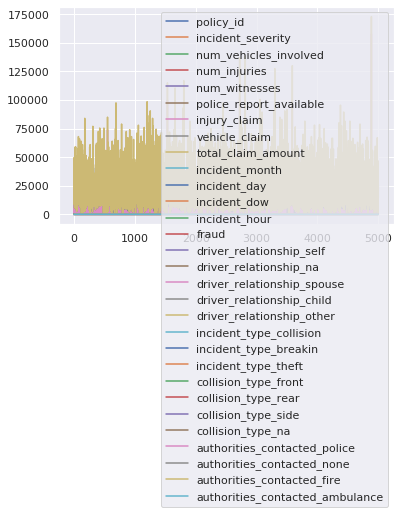

In [30]:
df_claims.plot()

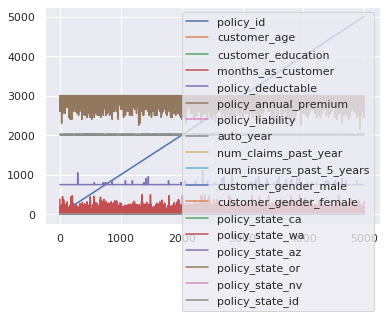

In [31]:
df_customer.plot()

In [32]:
df_claims.isnull().sum()

policy_id                          0
incident_severity                  0
num_vehicles_involved              0
num_injuries                       0
num_witnesses                      0
police_report_available            0
injury_claim                       0
vehicle_claim                      0
total_claim_amount                 0
incident_month                     0
incident_day                       0
incident_dow                       0
incident_hour                      0
fraud                              0
driver_relationship_self           0
driver_relationship_na             0
driver_relationship_spouse         0
driver_relationship_child          0
driver_relationship_other          0
incident_type_collision            0
incident_type_breakin              0
incident_type_theft                0
collision_type_front               0
collision_type_rear                0
collision_type_side                0
collision_type_na                  0
authorities_contacted_police       0
a

In [33]:
df_customer.isnull().sum()

policy_id                    0
customer_age                 0
customer_education           0
months_as_customer           0
policy_deductable            0
policy_annual_premium        0
policy_liability             0
auto_year                    0
num_claims_past_year         0
num_insurers_past_5_years    0
customer_gender_male         0
customer_gender_female       0
policy_state_ca              0
policy_state_wa              0
policy_state_az              0
policy_state_or              0
policy_state_nv              0
policy_state_id              0
dtype: int64

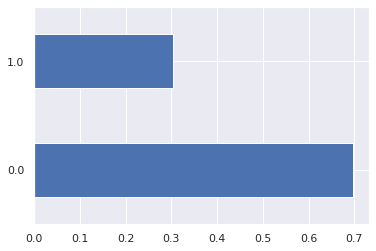

In [34]:
import matplotlib.pyplot as plt
df_customer.customer_gender_female.value_counts(normalize=True)

#plot the bar graph of percentage job categories
df_customer.customer_gender_female.value_counts(normalize=True).plot.barh()
plt.show()

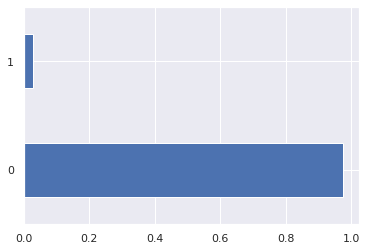

In [35]:
df_claims.fraud.value_counts(normalize=True)

#plot the bar graph of percentage job categories
df_claims.fraud.value_counts(normalize=True).plot.barh()
plt.show()

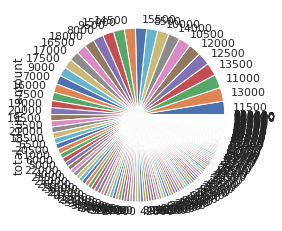

In [36]:
#calculate the percentage of each education category.
df_claims.total_claim_amount.value_counts(normalize=True)

#plot the pie chart of education categories
df_claims.total_claim_amount.value_counts(normalize=True).plot.pie()
plt.show()

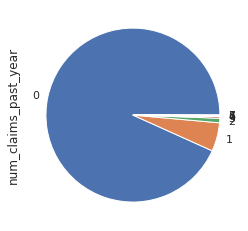

In [37]:
#calculate the percentage of each education category.
df_customer.num_claims_past_year.value_counts(normalize=True)

#plot the pie chart of education categories
df_customer.num_claims_past_year.value_counts(normalize=True).plot.pie()
plt.show()

In [38]:
df_customer.num_claims_past_year.describe()

count    5000.000000
mean        0.093000
std         0.422832
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: num_claims_past_year, dtype: float64

In [39]:
df_claims.fraud.describe()

count    5000.000000
mean        0.027200
std         0.162682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fraud, dtype: float64

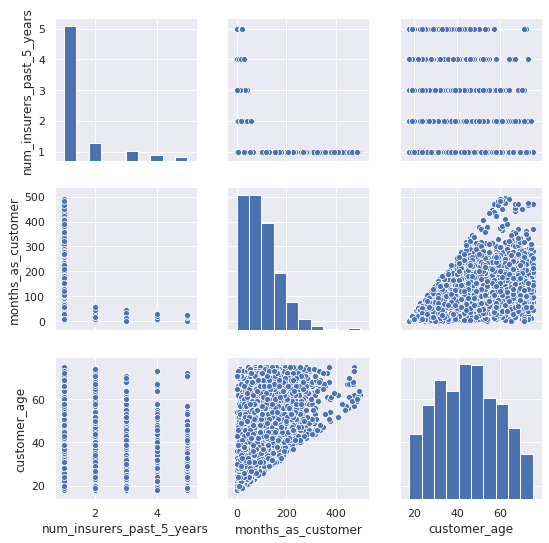

In [57]:
#plot the pair plot of salary, balance and age in data dataframe.
import seaborn as sns
sns.pairplot(data = df_customer, vars=['num_insurers_past_5_years','months_as_customer','customer_age'])
plt.show()

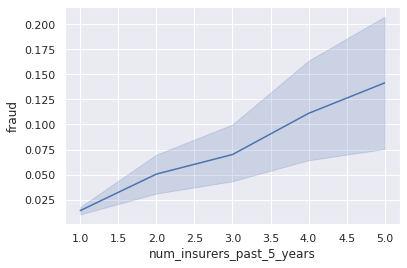

In [55]:
sns.lineplot(x=df_customer['num_insurers_past_5_years'],y=df_claims['fraud'])

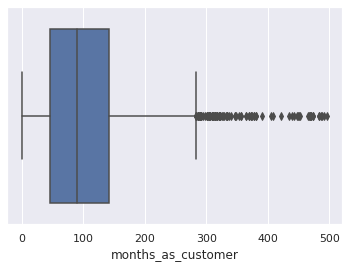

In [42]:
sns.boxplot(x=df_customer['months_as_customer'])

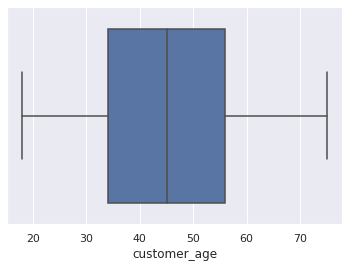

In [43]:
sns.boxplot(x=df_customer['customer_age'])

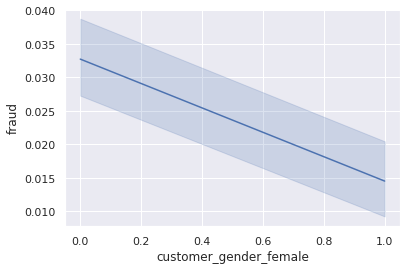

In [52]:
sns.lineplot(x=df_customer['customer_gender_female'], y = df_claims['fraud'])

In [58]:
df_combined = pd.read_csv("./data/claims_customer.csv")

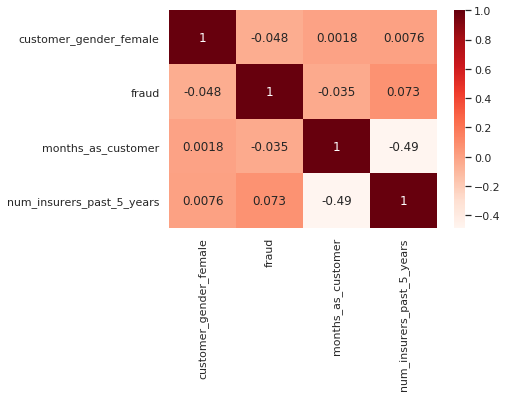

In [61]:
# Creating a matrix using age, salry, balance as rows and columns
df_combined[['customer_gender_female','fraud','months_as_customer', 'num_insurers_past_5_years']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(df_combined[['customer_gender_female','fraud','months_as_customer','num_insurers_past_5_years']].corr(), annot=True, cmap = 'Reds')
plt.show()

<a id ='components'> </a>
## Solution Components
[overview](#solution)

The following [SageMaker](https://sagemaker.readthedocs.io/en/stable/v2.html) Services are used in this solution:

 1. [SageMaker DataWrangler](https://aws.amazon.com/sagemaker/data-wrangler/) - [docs](https://docs.aws.amazon.com/sagemaker/latest/dg/data-wrangler.html)
 1. [SageMaker Processing](https://aws.amazon.com/blogs/aws/amazon-sagemaker-processing-fully-managed-data-processing-and-model-evaluation/) - [docs](https://sagemaker.readthedocs.io/en/stable/amazon_sagemaker_processing.html)
 1. [SageMaker Feature Store](https://aws.amazon.com/sagemaker/feature-store/)- [docs](https://sagemaker.readthedocs.io/en/stable/amazon_sagemaker_featurestore.html)
 1. [SageMaker Clarify](https://aws.amazon.com/sagemaker/clarify/)- [docs](https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-processing-job-run.html)
 1. [SageMaker Training with XGBoost Algorithm and Hyperparameter Optimization](https://sagemaker.readthedocs.io/en/stable/frameworks/xgboost/using_xgboost.html)- [docs](https://sagemaker.readthedocs.io/en/stable/frameworks/xgboost/index.html)
 1. [SageMaker Model Registry](https://docs.aws.amazon.com/sagemaker/latest/dg/model-registry.html)- [docs](https://docs.aws.amazon.com/sagemaker/latest/dg/model-registry-deploy.html#model-registry-deploy-api)
 1. [SageMaker Hosted Endpoints]()- [predictors - docs](https://sagemaker.readthedocs.io/en/stable/api/inference/predictors.html)
 1. [SageMaker Pipelines]()- [docs](https://sagemaker.readthedocs.io/en/stable/workflows/pipelines/index.html)
    

![Solution Components](images/solution-components-e2e.png)

<a id ='architecture'> </a>
## Solution Architecture
We will follow 5 phases in the ML Life-cycle and show the Architecture and a link to the Notebook (code) for each phase.
[overview](#solution)

<a id ='data-prep'> </a>
### [Notebook 1](./1-data-prep-e2e.ipynb) : Data Prep . Ingest, transform and preprocess data, store in Feature Store
[overview](#solution)

![Solution Architecture](images/e2e-1-pipeline-v3b.png)



<a id ='train-store'> </a>
### [Notebook 2](./2-lineage-train-assess-bias-tune-registry-e2e.ipynb) and [Notebook 3](./3-mitigate-bias-train-model2-registry-e2e.ipynb) :   Train, Tune and Check Pre- and Post- Training Bias, Mitigate Bias, Re-train, Deposit Best Model in Model Registry
[overview](#solution)

![Solution Architecture](images/e2e-2-pipeline-v3b.png)

<a id ='deploy-predict'> </a>
### [Notebooks 4](./4-deploy-run-inference-e2e.ipynb) :   Load Best Model from Registry. Deploy it on SageMaker Hosted Endpoint. Run Predictions. 
[overview](#solution)

![Solution Architecture](images/e2e-3-pipeline-v3b.png)

<a id ='pipeline'> </a>
   ### [Notebooks 5 : End to End Pipeline](./5-pipeline-e2e.ipynb). MLOps Pipeline to run an end to end automated workflow with all the design decisions made during manual/exploratory steps in previous notebooks.
[overview](#solution)   

![Notebook5 Pipelines](images/e2e-5-pipeline-v3b.png)

<a id ='code'> </a>
## Code Resources

[overview](#solution)

### Stages

Our solution is split into the following stages of the [ML Lifecycle](#ml-lifecycle), and each stage has it's own [notebook]():

* [Use-case and Architecture](./0-AutoClaimFraudDetection.ipynb): We take a high-level look at the use-case, solution components and architecture.
* [Data Prep and Store](./1-data-prep-e2e.ipynb): We prepare a dataset for machine learning using SageMaker DataWrangler, create and deposit the datasets in a SageMaker FeatureStore. [--> Architecture](#data-prep)
* [Train, Assess Bias, Establish Lineage, Register Model](./2-lineage-train-assess-bias-tune-registry-e2e.ipynb): We detect possible pre-training and post-training bias, train and tune a XGBoost model using Amazon SageMaker, record Lineage in the Model Registry so we can later deploy it. [--> Architecture](#train-store)
* [Mitigate Bias, Re-train, Register New Model](./3-mitigate-bias-train-model2-registry-e2e.ipynb): We mitigate bias, retrain a less biased model, store it in a Model Registry.  [--> Architecture](#train-store)
* [Deploy and Serve](./4-deploy-run-inference-e2e.ipynb): We deploy the model to a Amazon SageMaker Hosted Endpoint and run realtime inference via the SageMaker Online Feature Store . [--> Architecture](#deploy-predict)
* [Create and Run an MLOps Pipeline](./5-pipeline-e2e.ipynb): We then create a SageMaker Pipeline that ties together everything we have done so far, from outputs from Data Wrangler, Feature Store, Clarify , Model Registry and finally deployment to a SageMaker Hosted Endpoint. [--> Architecture](#pipeline)
* [Conclusion](./6-conclusion-e2e.ipynb): We wrap things up and discuss how to clean up the solution.

<a id ='workflows'> </a>
# The Data Science and ML Ops Workflows

[overview](#solution)

![the 2 flows](images/2-flows.png)

<a id ='ml-lifecycle'></a>
# The Machine Learning Life-cycle: detailed View
[overview](#solution)

![title](images/ML-Lifecycle-v5.png)

The Red Boxes and Icons represent comparatively newer concepts and tasks that are now deemed important to include and execute, in a production-oriented (versus research-oriented) and scalable ML lifecycle.

 These newer lifecycle tasks and their corresponding, supporting AWS Services and features include:

1. [*Data Wrangling*](): AWS Data Wrangler for cleaning, normalizing, transforming and encoding data, as well as join ing datasets. The outputs of Data Wrangler are code generated to work with SageMaker Processing, SageMaker Pipelines, SageMaker Feature Store or just a plain old python script with pandas,
    1. Feature Engineering has always been done, but now with AWS Data Wrangler we can use a GUI based tool to do so and generate code for the next phases of the life-cycle.
2. [*Detect Bias*](): Using AWS Clarify, in Data Prep or in Training we can detect pre-training and post-training bias, and eventually at Inference time provide Interpretability / Explainability of the inferences (e.g., which factors were most influential in coming up with the prediction)
3. [*Feature Store [Offline]*](): Once we have done all of our feature engineering, the encoding and transformations, we can then standardize features, offline in AWS Feature Store, to be used as input features for training models.
4. [*Artifact Lineage*](): Using AWS SageMaker’s Artifact Lineage features we can associate all the artifacts (data, models, parameters, etc.) with a trained model to produce meta data that can be stored in a Model Registry.
5. [*Model Registry*](): AWS Model Registry stores the meta data around all artifacts that you have chosen to include in the process of creating your models, along with the model(s) themselves in a Model Registry. Later a human approval can be used to note that the model is good to be put into production. This feeds into the next phase of deploy and monitor .
6. [*Inference and the Online Feature Store*](): For realtime inference, we can leverage a online AWS Feature Store we have created to get us single digit millisecond low latency and high throughput for serving our model with new incoming data.
7. [*Pipelines*]():  Once we have experimented and decided on the various options in the lifecycle (which transforms to apply to our features, imbalance or bias in the data, which algorithms to choose to train with, which hyper-parameters are giving us the best performance metrics, etc.) we can now automate the various tasks across the lifecycle using SageMaker Pipelines. 
    1. In this blog, we will show a pipeline that starts with the outputs of AWS Data Wrangler and ends with storing trained models in the Model Registry. 
    2. Typically, you could have a pipeline for data prep, one for training until model registry (which we are showing in the code associated with this blog) , one for inference, and one for re-training using SageMaker Monitor to detect model drift and data drift and trigger a re-training using , say an AWS Lambda function.



[overview](#solution)

[Go to the next notebook, Data Prep](./1-data-prep-e2e.ipynb)